In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy.random as npr

In [14]:
from sklearn import datasets

iris = datasets.load_iris()

# let us check what has been loaded
print(dir(iris))
# a short description
print(iris.DESCR)
print(iris.target_names)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76 

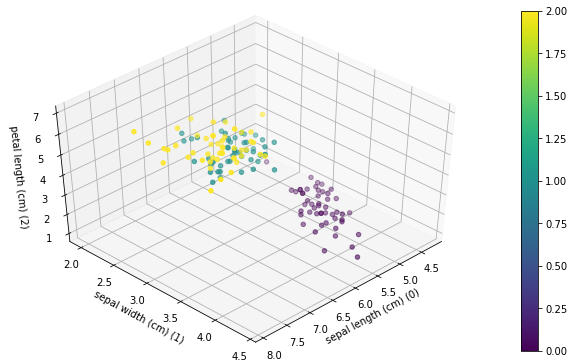

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')
figiris = ax.scatter(iris.data[:,0],iris.data[:,1],iris.data[:,2],c=iris.target)
ax.set_xlabel(iris.feature_names[0]+' (0)')
ax.set_ylabel(iris.feature_names[1]+' (1)')
ax.set_zlabel(iris.feature_names[2]+' (2)')

# this adjusts the space around the plot so we can read the z label
plt.gcf().subplots_adjust(left=-0.5,bottom=-0.3)


plt.colorbar(figiris)
ax.view_init(45,45)

In [15]:
from sklearn import svm

X = iris.data[:,[0,1,2]]
y = iris.target

rbf_svc = svm.SVC(kernel='poly', gamma=0.7, decision_function_shape='ovo').fit(X, y)


In [7]:


x = np.linspace(X[:, 0].min(), X[:, 0].max(), 100) 
y = np.linspace(X[:, 1].min(), X[:, 1].max(), 100) 
z = np.linspace(X[:, 2].min(), X[:, 2].max(), 100)

xx,yy,zz = np.meshgrid(x,y,z, indexing = 'ij')

allpts = np.vstack((xx.ravel(),yy.ravel(),zz.ravel())).T

regions = rbf_svc.predict(allpts)
zeros = allpts[np.where(regions == 0),:][0]
ones = allpts[np.where(regions == 1),:][0]
twos = allpts[np.where(regions == 2),:][0]



In [8]:
m = zeros.shape[0]
surfz = np.vstack([ zeros[i+1,:] for i in range(m-1) if np.any(zeros[i,[0,1]] != zeros[i+1,[0,1]]) ])
print(surfz.shape)


(9999, 3)


In [9]:
m = ones.shape[0]
surfo = np.vstack([ ones[i+1,:] for i in range(m-1) if np.any(ones[i,[0,1]] != ones[i+1,[0,1]]) ])
print(surfo.shape)



(9999, 3)


In [10]:
m = twos.shape[0]
surft = np.vstack([ twos[i+1,:] for i in range(m-1) if np.any(twos[i,[0,1]] != twos[i+1,[0,1]]) ])
print(surft.shape)


(9999, 3)


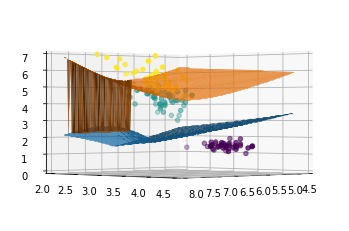

In [12]:

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_zlim(0,7)
#ax.plot_trisurf(surfz[:,0],surfz[:,1],surfz[:,2])
ax.plot_trisurf(surfo[:,0],surfo[:,1],surfo[:,2])
ax.plot_trisurf(surft[:,0],surft[:,1],surft[:,2])
ax.scatter(iris.data[:,0],iris.data[:,1],iris.data[:,2],c=iris.target)

ax.view_init(0,45)